# Coronavirus Sentiment Classification Predictive Model Using NLP-Naive Bayer Approach

# Importing main libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
corona_db= pd.read_csv("Corona_NLP_test.csv")
corona_db_test= pd.read_csv("Corona_NLP_test.csv")

In [3]:
corona_db.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [4]:
corona_db["OriginalTweet"].describe()

count                                                  3798
unique                                                 3798
top       #ITV #Vera opening scene a supermarket full of...
freq                                                      1
Name: OriginalTweet, dtype: object

In [5]:
corona_db.groupby("Sentiment").describe()

UserName                                                  \
                      count         mean          std  min      25%     50%   
Sentiment                                                                     
Extremely Negative    592.0  1949.851351  1082.538876  1.0  1016.75  1965.0   
Extremely Positive    599.0  1919.243740  1140.516710  3.0   895.50  1899.0   
Negative             1041.0  1828.076849  1081.735474  4.0   852.00  1819.0   
Neutral               619.0  1939.915994  1107.057372  5.0  1014.50  1945.0   
Positive              947.0  1907.630412  1084.444727  2.0   998.50  1920.0   

                                    ScreenName                             \
                        75%     max      count          mean          std   
Sentiment                                                                   
Extremely Negative  2890.75  3797.0      592.0  46901.851351  1082.538876   
Extremely Positive  2978.50  3798.0      599.0  46871.243740  1140.516710   
Negative            2724.00  3795.0     1041.0  46780.076849  1081.735474   
Neutral             2927.50  3796.0      619.0  46891.915994  1107.057372   
Positive            2829.50  3794.0      947.0  46859.630412  1084.444727   

                                                                   
                        min       25%      50%       75%      max  
Sentiment                                                          
Extremely Negative  44953.0  45968.75  46917.0  47842.75  48749.0  
Extremely Positive  44955.0  45847.50  46851.0  47930.50  48750.0  
Negative            44956.0  45804.00  46771.0  47676.00  48747.0  
Neutral             44957.0  45966.50  46897.0  47879.50  48748.0  
Positive            44954.0  45950.50  46872.0  47781.50  48746.0

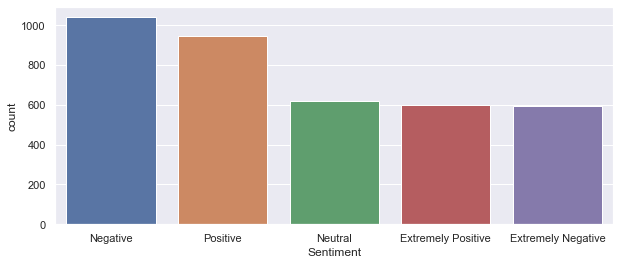

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
ax = sns.countplot(x="Sentiment", data=corona_db, order = corona_db['Sentiment'].value_counts().index)

At first sight, it seems that the data is well balanced, since it has a evenly distrubution of data points between each category

In [7]:
corona_db['length'] = corona_db['OriginalTweet'].apply(len)
corona_db['length'].head()

0    228
1    193
2     73
3    318
4    252
Name: length, dtype: int64

<AxesSubplot:xlabel='length', ylabel='Count'>

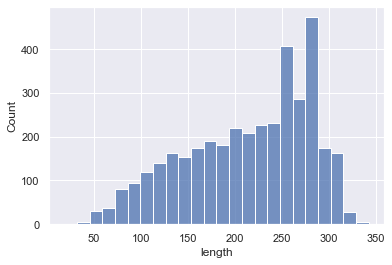

In [8]:
sns.histplot(data=corona_db, x="length")

The majority of the coronavirus related tweets seems to be concentrated below the 300 words limit. On the other hand, there are some cases that surpasses that limit

array([[<AxesSubplot:title={'center':'Extremely Negative'}>,
        <AxesSubplot:title={'center':'Extremely Positive'}>],
       [<AxesSubplot:title={'center':'Negative'}>,
        <AxesSubplot:title={'center':'Neutral'}>],
       [<AxesSubplot:title={'center':'Positive'}>, <AxesSubplot:>]],
      dtype=object)

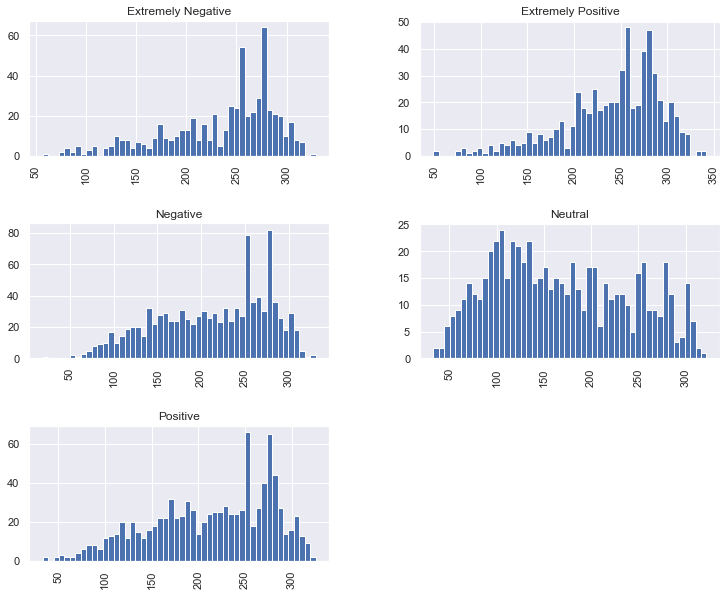

In [9]:
corona_db.hist(column='length', by='Sentiment', bins=50,figsize=(12,10))

Extremely negative, negative, positive and extremely positive tweets tend to be written using between 250 and 300 words. Neutral tweets, however, tend to be more shorter ranging between 100 and 200 words in average. 

## Text Pre-processing

In [39]:
import nltk 
import string

Tokenize Sentences and Removing Punctuation 

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We need to remove common words (stopwords from now on) used in English language that doesnt provide any predictive value if they are considered in the model. For that, we need to use the stopwords given by the nltk library

In [40]:
def removeStopWords(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [82]:
corona_db["OriginalTweet"].head(5).apply(removeStopWords)
corona_db_test["OriginalTweet"].head(5).apply(removeStopWords)

0    [TRENDING, New, Yorkers, encounter, empty, sup...
1    [couldnt, find, hand, sanitizer, Fred, Meyer, ...
2            [Find, protect, loved, ones, coronavirus]
3    [Panic, buying, hits, NewYork, City, anxious, ...
4    [toiletpaper, dunnypaper, coronavirus, coronav...
Name: OriginalTweet, dtype: object

## Vectorization

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
tokenized_DataFrame= pd.DataFrame(tokenized)
tokenized_DataFrame

,OriginalTweet
0,"[TRENDING, New, Yorkers, encounter, empty, sup..."
1,"[When, I, couldn, t, find, hand, sanitizer, at..."
2,"[Find, out, how, you, can, protect, yourself, ..."
3,"[Panic, buying, hits, NewYork, City, as, anxio..."
4,"[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...
3793,"[Meanwhile, In, A, Supermarket, in, Israel, Pe..."
3794,"[Did, you, panic, buy, a, lot, of, non, perish..."
3795,"[Asst, Prof, of, Economics, cconces, was, on, ..."
3796,"[Gov, need, to, do, somethings, instead, of, b..."


In [24]:
tokenized_db=pd.concat([tokenized_DataFrame,corona_db["Sentiment"]], axis=1)
tokenized_db

,OriginalTweet,Sentiment
0,"[TRENDING, New, Yorkers, encounter, empty, sup...",Extremely Negative
1,"[When, I, couldn, t, find, hand, sanitizer, at...",Positive
2,"[Find, out, how, you, can, protect, yourself, ...",Extremely Positive
3,"[Panic, buying, hits, NewYork, City, as, anxio...",Negative
4,"[toiletpaper, dunnypaper, coronavirus, coronav...",Neutral
...,...,...
3793,"[Meanwhile, In, A, Supermarket, in, Israel, Pe...",Positive
3794,"[Did, you, panic, buy, a, lot, of, non, perish...",Negative
3795,"[Asst, Prof, of, Economics, cconces, was, on, ...",Neutral
3796,"[Gov, need, to, do, somethings, instead, of, b...",Extremely Negative


In [83]:
vect = CountVectorizer(analyzer=removeStopWords).fit(corona_db["OriginalTweet"])
vect_test = CountVectorizer(analyzer=removeStopWords).fit(corona_db_test["OriginalTweet"])

In [84]:
vect_coronadb = vect.transform(corona_db["OriginalTweet"])
vect_coronadb_test = vect.transform(corona_db_test["OriginalTweet"])

In [85]:
print('Shape of Sparse Matrix: ', vect_coronadb.shape)
print('Amount of Non-Zero occurences: ', vect_coronadb.nnz)
print('Shape of Sparse Matrix on Test: ', vect_coronadb_test.shape)
print('Amount of Non-Zero occurences on Test: ', vect_coronadb_test.nnz)

Shape of Sparse Matrix:  (3798, 17027)
Amount of Non-Zero occurences:  73632
Shape of Sparse Matrix on Test:  (3798, 17027)
Amount of Non-Zero occurences on Test:  73632


In [86]:
vect_coronadb
vect_coronadb_test

<3798x17027 sparse matrix of type '<class 'numpy.int64'>'
	with 73632 stored elements in Compressed Sparse Row format>

###  TF-IDF Transformation

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(vect_coronadb)
tfidf4_coronadb = tfidf_transformer.transform(vect_coronadb)
tfidf4_coronadb_test = tfidf_transformer.transform(vect_coronadb_test)



## Predicting (Without Pipeline)

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [90]:
tweet_sentiment_detecter= MultinomialNB().fit(tfidf4_coronadb,corona_db["Sentiment"])

In [97]:
predictions= tweet_sentiment_detecter.predict(tfidf4_coronadb_test)
print(predictions[0:5])
print(corona_db["Sentiment"][0:5])

['Negative' 'Positive' 'Extremely Positive' 'Negative' 'Negative']
0    Extremely Negative
1              Positive
2    Extremely Positive
3              Negative
4               Neutral
Name: Sentiment, dtype: object


In [94]:
print(classification_report(corona_db["Sentiment"], predictions))

                    precision    recall  f1-score   support

Extremely Negative       1.00      0.24      0.38       592
Extremely Positive       1.00      0.35      0.52       599
          Negative       0.50      1.00      0.67      1041
           Neutral       1.00      0.33      0.49       619
          Positive       0.74      0.92      0.82       947

          accuracy                           0.65      3798
         macro avg       0.85      0.57      0.58      3798
      weighted avg       0.80      0.65      0.61      3798



In [95]:
print(confusion_matrix(predictions,corona_db["Sentiment"]))

[[ 140    0    0    0    0]
 [   0  208    0    0    0]
 [ 414  204 1039  334   74]
 [   1    0    0  202    0]
 [  37  187    2   83  873]]


## Predicting (With Pipeline)

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
coronadb_test= pd.read_csv("Corona_NLP_test.csv")

In [59]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=removeStopWords)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [67]:
pipeline.fit(corona_db["OriginalTweet"],corona_db["Sentiment"])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function removeStopWords at 0x000001F9437E51F8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [68]:
predictions = pipeline.predict(coronadb_test["OriginalTweet"])

In [72]:
from sklearn.metrics import classification_report
print(classification_report(predictions,coronadb_test["Sentiment"]))
confusion_matrix(predictions,coronadb_test["Sentiment"])

                    precision    recall  f1-score   support

Extremely Negative       0.24      1.00      0.38       140
Extremely Positive       0.35      1.00      0.52       208
          Negative       1.00      0.50      0.67      2065
           Neutral       0.33      1.00      0.49       203
          Positive       0.92      0.74      0.82      1182

          accuracy                           0.65      3798
         macro avg       0.57      0.85      0.58      3798
      weighted avg       0.87      0.65      0.69      3798



array([[ 140,    0,    0,    0,    0],
       [   0,  208,    0,    0,    0],
       [ 414,  204, 1039,  334,   74],
       [   1,    0,    0,  202,    0],
       [  37,  187,    2,   83,  873]], dtype=int64)

In [73]:
predictions

array(['Negative', 'Positive', 'Extremely Positive', ..., 'Neutral',
       'Extremely Negative', 'Extremely Positive'], dtype='<U18')

It seems that is a good but not excellent predictive model. Viewing the confusion matrix, it has some problems predicting negative tweets, maybe because it results difficult for the model to separate between extremely negative and negative tweets. 